In [12]:
import pandas as pd
import gym
from gradient_free.model import MLP
from gradient_free.agent import Agent
from gradient_free.hill_climbing import HillClimbing
from gradient_free.run import policy_based_run
import matplotlib.pyplot as plt

In [6]:
env = gym.make('CartPole-v1')

print(f'Max Steps in an episode: {env.spec.max_episode_steps}')
print(f'Reward threshold: {env.spec.reward_threshold}')
print(f'State Space: {env.observation_space.shape}')
print(f'Action Space: {env.action_space}')
print('-'*60)
print('State Example:')
print(env.observation_space.sample())

Max Steps in an episode: 500
Reward threshold: 475.0
State Space: (4,)
Action Space: Discrete(2)
------------------------------------------------------------
State Example:
[ 1.8881960e+00 -7.9996409e+37  2.8373116e-01 -1.6701270e+38]


## 1. Vanilla HillClimbing

In [9]:
# Create CartPole Environment
env = gym.make('CartPole-v1')
# Instantiate Model
model = MLP(n_input=4, n_output=2, n_hidden=None, random_state=110)
# Instantiate an agent
agent = Agent(env, model, stochastic_policy=False)
# Create an optimizer
opt = HillClimbing(method='vanilla',  noise_scale=0.1)
# Run for
scores_vanilla = policy_based_run(agent, optimizer=opt, n_episodes=5000, t_max=1000, gamma=1.0)

Episode 100/5000: Average Score for last 100 episodes=84.46
Episode 200/5000: Average Score for last 100 episodes=122.26
Episode 300/5000: Average Score for last 100 episodes=112.99
Episode 400/5000: Average Score for last 100 episodes=113.5
Episode 500/5000: Average Score for last 100 episodes=108.95
Episode 600/5000: Average Score for last 100 episodes=112.59
Episode 700/5000: Average Score for last 100 episodes=116.86
Episode 800/5000: Average Score for last 100 episodes=110.34
Episode 900/5000: Average Score for last 100 episodes=110.79
Episode 1000/5000: Average Score for last 100 episodes=109.53
Episode 1100/5000: Average Score for last 100 episodes=107.73
Episode 1200/5000: Average Score for last 100 episodes=119.23
Episode 1300/5000: Average Score for last 100 episodes=132.62
Episode 1400/5000: Average Score for last 100 episodes=133.38
Episode 1500/5000: Average Score for last 100 episodes=134.09
Episode 1600/5000: Average Score for last 100 episodes=128.39
Episode 1700/5000: 

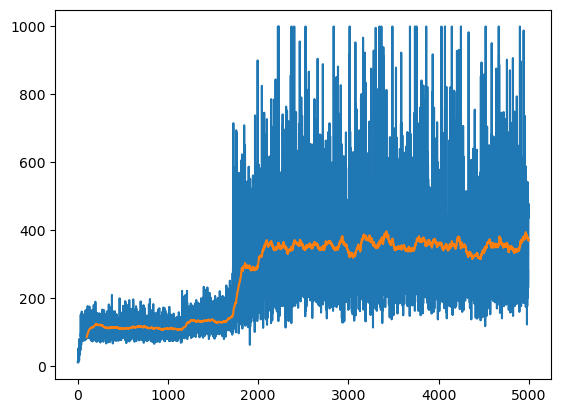

In [13]:
plt.plot(scores_vanilla)
plt.plot(pd.Series(scores_vanilla).rolling(100).mean())

## 2. Steepest Ascent HillClimbing

In [18]:
# Create CartPole Environment
env = gym.make('CartPole-v1')
# Instantiate Model
model = MLP(n_input=4, n_output=2, n_hidden=None, random_state=110)
# Instantiate an agent
agent = Agent(env, model, stochastic_policy=False)
# Create an optimizer
opt = HillClimbing(method='steepest_ascent',  noise_scale=0.1, n_candidates=5)
# Run for
scores_steep = policy_based_run(agent, optimizer=opt, n_episodes=5000, t_max=1000, gamma=1.0)

Episode 100/5000: Average Score for last 100 episodes=190.62
Agent reached the target score of 500.0 in 145 episodes!


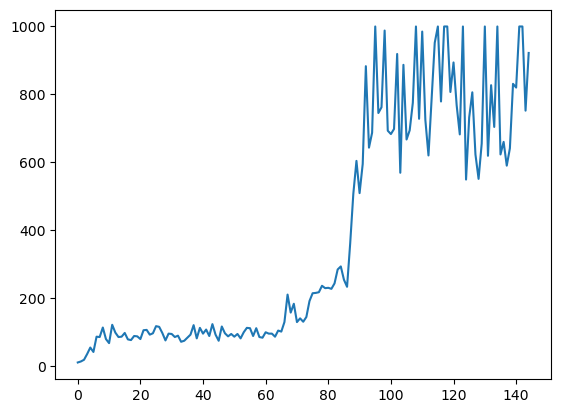

In [26]:
plt.plot(scores_steep)

## 3. Simulated Annealing

In [24]:
# Create CartPole Environment
env = gym.make('CartPole-v1')
# Instantiate Model
model = MLP(n_input=4, n_output=2, n_hidden=None, random_state=110)
# Instantiate an agent
agent = Agent(env, model, stochastic_policy=False)
# Create an optimizer
opt = HillClimbing(method='simulated_annealing',  noise_scale=0.1, n_candidates=5, down_rate=0.9)
# Run for
scores_siman = policy_based_run(agent, optimizer=opt, n_episodes=5000, t_max=1000, gamma=1.0)

Episode 100/5000: Average Score for last 100 episodes=477.34
Agent reached the target score of 500.0 in 105 episodes!


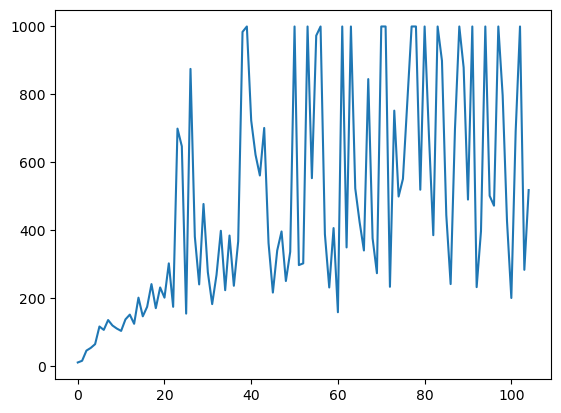

In [25]:
plt.plot(scores_siman)

## 4. Adaptive Noise Scaling

In [27]:
# Create CartPole Environment
env = gym.make('CartPole-v1')
# Instantiate Model
model = MLP(n_input=4, n_output=2, n_hidden=None, random_state=110)
# Instantiate an agent
agent = Agent(env, model, stochastic_policy=False)
# Create an optimizer
opt = HillClimbing(method='adaptive_noise_scaling',  noise_scale=0.1, n_candidates=5, down_rate=0.9, up_rate=1.1)
# Run for
scores_ans = policy_based_run(agent, optimizer=opt, n_episodes=5000, t_max=1000, gamma=1.0)

Episode 100/5000: Average Score for last 100 episodes=244.41
Episode 200/5000: Average Score for last 100 episodes=484.91pisode 188/5000: Score=1000.0Episode 197/5000: Score=1000.0
Agent reached the target score of 500.0 in 204 episodes!


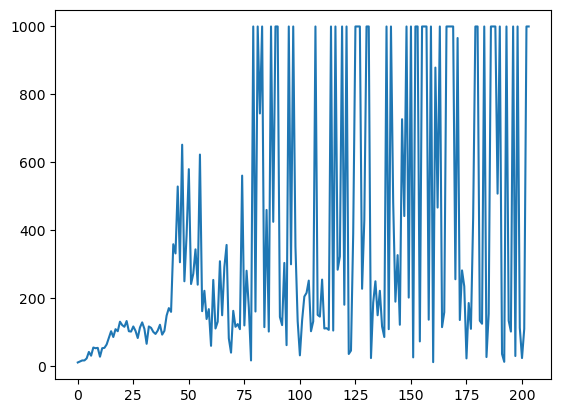

In [29]:
plt.plot(scores_ans)